In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
atlanta_df = pd.read_csv('../Data/Clean/Atlanta.csv')

In [3]:
atlanta_df.head()


,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,53.0,35.0,45.0,12315.431363,0.160343,298699.954978,1580.0,6828.0,216365.714317,3.482,4.033,0.550
1,2018-02,52.0,31.0,40.0,13361.053631,0.155572,309807.747078,1885.0,7862.0,218318.581498,3.785,4.330,0.545
2,2018-03,53.0,32.0,35.0,13712.279370,0.170905,325455.767902,2384.0,10600.0,220179.198175,3.910,4.444,0.534
3,2018-04,56.0,32.0,31.0,13456.497756,0.185078,324589.131298,1967.0,10883.0,221743.705815,3.925,4.468,0.543
4,2018-05,57.0,33.0,30.0,13292.195069,0.214794,338943.512924,1977.0,12512.0,223227.417852,4.066,4.586,0.520


In [4]:
# Check for missing values 
print(atlanta_df.isnull().sum())

DATE                         0
MarketTempIdx                0
DaysToClose                  0
DaysOnZillow                 0
ListingPriceCutAmt           0
ListingPriceCutPct           0
NewConstructMeanSalePrice    0
NewConstructSalesCount       0
SalesCount                   0
SalePrice                    0
MORTGAGE15US                 0
MORTGAGE30US                 0
RATE_DIFFERENCE              0
dtype: int64


In [5]:
atlanta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       78 non-null     object 
 1   MarketTempIdx              78 non-null     float64
 2   DaysToClose                78 non-null     float64
 3   DaysOnZillow               78 non-null     float64
 4   ListingPriceCutAmt         78 non-null     float64
 5   ListingPriceCutPct         78 non-null     float64
 6   NewConstructMeanSalePrice  78 non-null     float64
 7   NewConstructSalesCount     78 non-null     float64
 8   SalesCount                 78 non-null     float64
 9   SalePrice                  78 non-null     float64
 10  MORTGAGE15US               78 non-null     float64
 11  MORTGAGE30US               78 non-null     float64
 12  RATE_DIFFERENCE            78 non-null     float64
dtypes: float64(12), object(1)
memory usage: 8.1+ KB


In [6]:
# Check the shape of Atlanta DataFrame (rows, columns)
print(atlanta_df.shape)

(78, 13)


In [7]:
# Round the specified columns to 0 decimals
atlanta_df['ListingPriceCutAmt'] = atlanta_df['ListingPriceCutAmt'].round(0)
atlanta_df['NewConstructMeanSalePrice'] = atlanta_df['NewConstructMeanSalePrice'].round(0)
atlanta_df['SalePrice'] = atlanta_df['SalePrice'].round(0)
atlanta_df.head()

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,53.0,35.0,45.0,12315.0,0.160343,298700.0,1580.0,6828.0,216366.0,3.482,4.033,0.550
1,2018-02,52.0,31.0,40.0,13361.0,0.155572,309808.0,1885.0,7862.0,218319.0,3.785,4.330,0.545
2,2018-03,53.0,32.0,35.0,13712.0,0.170905,325456.0,2384.0,10600.0,220179.0,3.910,4.444,0.534
3,2018-04,56.0,32.0,31.0,13456.0,0.185078,324589.0,1967.0,10883.0,221744.0,3.925,4.468,0.543
4,2018-05,57.0,33.0,30.0,13292.0,0.214794,338944.0,1977.0,12512.0,223227.0,4.066,4.586,0.520


In [8]:
#Linear Regression for Atlanta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
#Split Atlanta Data into training and test set
X = atlanta_df[['MarketTempIdx','DaysToClose', 'DaysOnZillow', 'ListingPriceCutAmt', 'ListingPriceCutPct', 'NewConstructMeanSalePrice', 'NewConstructSalesCount', 'SalesCount', 'MORTGAGE15US', 'MORTGAGE30US', 'RATE_DIFFERENCE']]
y = atlanta_df['SalePrice']

In [10]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Linear Regression model
model = LinearRegression()

In [12]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Evaluate the model
y_pred = model.predict(X_test)

In [14]:
y_pred

array([249267.3493364 , 211427.58546219, 271769.41272725, 232629.0799631 ,
       240891.07070905, 385501.80734238, 250834.28959094, 226113.17879201,
       342886.28028184, 371127.1992042 , 384736.65476069, 241865.97028644,
       374045.23845108, 376022.63021405, 237441.55599727, 306409.58954093])

In [15]:
#y_pred_rounded = np.round(y_pred,0)

In [16]:
# Calculate evaluation metrics
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {linear_mse}")
print(f"R-Squared Score: {linear_r2}")

Mean Squared Error: 44323962.714868635
R-Squared Score: 0.9892577098168605


In [17]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf_model = RandomForestRegressor()

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [20]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
rf_y_pred = rf_model.predict(X_test)

In [22]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared Score: {rf_r2}")

Mean Squared Error: 44323962.714868635
R-squared Score: 0.9892577098168605


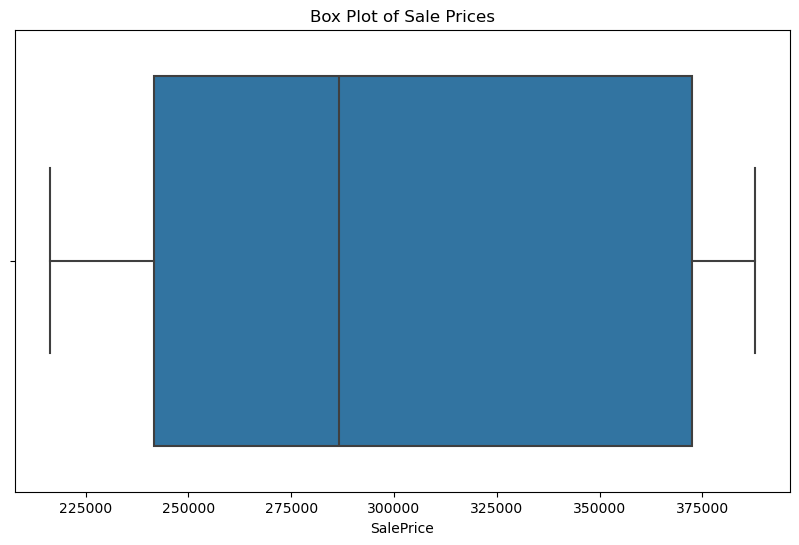

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'SalePrice' is your target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=atlanta_df['SalePrice'])
plt.title('Box Plot of Sale Prices')
plt.show()

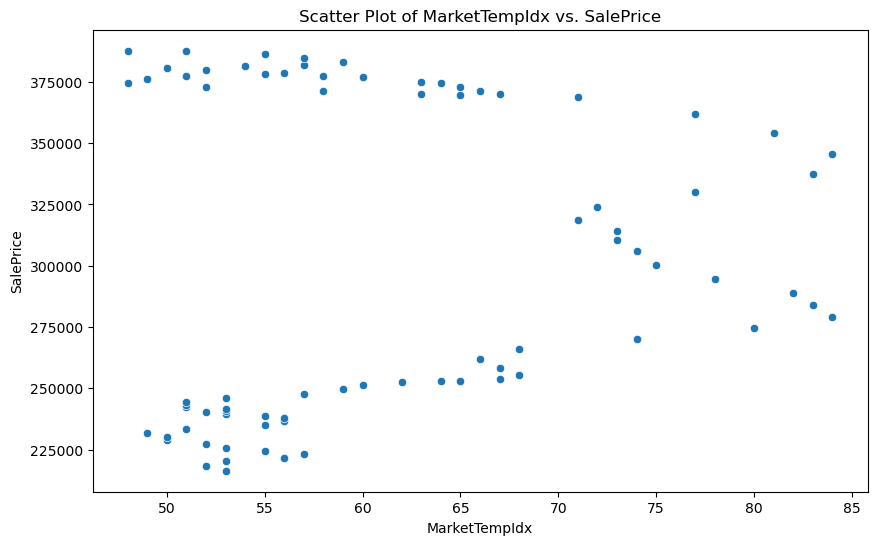

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=atlanta_df['MarketTempIdx'], y=atlanta_df['SalePrice'])
plt.title('Scatter Plot of MarketTempIdx vs. SalePrice')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


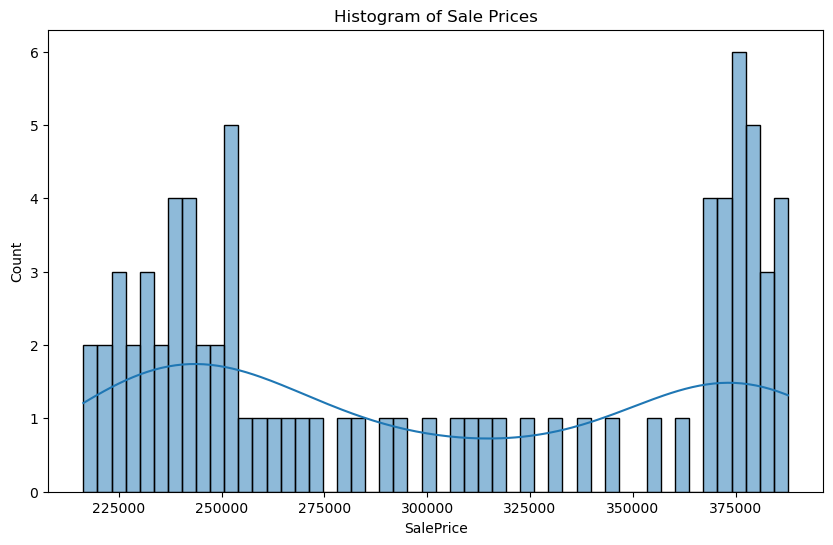

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(atlanta_df['SalePrice'], bins=50, kde=True)
plt.title('Histogram of Sale Prices')
plt.show()